In [2]:
import pandas
from matplotlib import pyplot as plt


           name  accuracy  noaug_acc  mflops  kparams     reference  \
0     PiczakCNN     0.750      0.730   168.0  25534.0        Piczak   
1        SB-CNN     0.780      0.720   152.0    432.0  SalomonBello   
2  Dmix-CNN-mel     0.826      0.747   837.0   1180.0  ZhichaoZhang   
3         D-CNN     0.819        NaN    85.0  33000.0         Zhang   
4        LD-CNN     0.790        NaN    19.8    500.0     Zhang2018   
5      DilaConv     0.780        NaN     NaN      NaN   YanChen2019   
7      EnvNetv2     0.783      0.691     NaN      NaN      Tokozume   
8         WSNet     0.700        NaN     NaN    288.0       Xiaojie   

                                   augmentation      features  mmacc  \
0  pitchshift,timestretch,dynamicrange,noisemix  logmel+delta   84.0   
1  pitchshift,timestretch,dynamicrange,noisemix        logmel   76.0   
2                  pitchshift,timestretch,mixup  logmel+delta  443.0   
3                                   timestretch  logmel+delta  330.0   


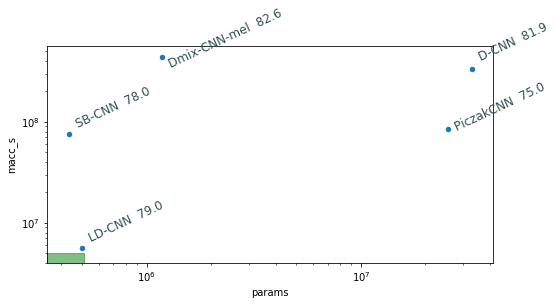

In [75]:
def check_missing(df, field, name='name'):
    missing = df[df[field].isna()]
    if len(missing):
        print('WARN. Missing "{}" for {}'.format(field, list(missing[name])))
    
def plot_models(data_path, figsize=(8,4)):

    fig, ax = plt.subplots(1, figsize=figsize)
    df = pandas.read_csv(data_path)
    df['params'] = df['kparams']*1e3
    df['macc_s'] = df['mmacc']*1e6
    # FIXME: calculate per-second
    
    df = df[df['name'] != 'Dmix-CNN-gt']
    
    print(df.head(20))
    
    check_missing(df, 'accuracy')
    check_missing(df, 'kparams')
    check_missing(df, 'mmacc')

    # FIXME: units need to be shifted
    # TODO: rename axes to be nice
    df.plot.scatter(x='params', y='macc_s', logx=True, logy=True, ax=ax)

    # highlight feasible region
    feasible_x = 512e3
    feasible_y = 5.0e6
    x = [ 0, feasible_x, feasible_x, 0 ]
    y = [ 0,  0, feasible_y, feasible_y ]
    ax.fill(x, y, color='green', alpha=0.5)
    
    def add_labels(row):
        xy = row.params, row.macc_s
        label = "{}  {:.1f}".format(row['name'], 100*row.accuracy) 
        ax.annotate(label, xy,
                    xytext=(5,40), 
                    textcoords='offset points',
                    size=12,
                    rotation=25,
                    color='darkslategrey')
    df.apply(add_labels, axis=1)

    return fig

plot_models('urbansound8k-existing.csv');